In [20]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
import cv2

In [21]:
#import the dataset and reading it with pandas

df = pd.read_csv('NYC Motor Vehicle Crashes/data_100000.csv', index_col= 'collision_id')

#showing all columns
pd.options.display.max_columns= 30
df.head(20)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
collision_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3654181,2017-04-18T00:00:00.000,23:10,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3665311,2017-05-06T00:00:00.000,13:00,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,1,0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
3658491,2017-04-27T00:00:00.000,17:15,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
3666554,2017-05-09T00:00:00.000,20:10,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,Motorcycle,Sedan,Bus,NaN,NaN
3653269,2017-04-18T00:00:00.000,14:00,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3666365,2017-05-08T00:00:00.000,10:33,NaN,NaN,40.556454,-74.207770,"(40.556454, -74.20777)",WEST SHORE EXPRESSWAY,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
3666842,2017-05-10T00:00:00.000,6:10,NaN,NaN,40.740025,-73.976260,"(40.740025, -73.97626)",1 AVENUE,EAST 28 STREET,NaN,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,Taxi,Box Truck,NaN,NaN,NaN
3657123,2017-04-24T00:00:00.000,9:30,BROOKLYN,11203.0,40.651646,-73.932330,"(40.651646, -73.93233)",EAST 48 STREET,CHURCH AVENUE,NaN,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3651039,2017-04-14T00:00:00.000,13:00,NaN,NaN,40.751800,-73.817314,"(40.7518, -73.817314)",ROBINSON STREET,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [22]:
#checking the initial shape
df.shape

(100000, 28)

In [23]:
df.isna().sum().sum()

871235

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zip_code,64966.0,10901.653188,523.494905,10000.00000,10457.000000,11209.000000,11354.000000,11697.00000
latitude,91965.0,40.651917,1.746143,0.00000,40.667915,40.717724,40.785595,40.91217
longitude,91965.0,-73.781995,3.276307,-201.23706,-73.960870,-73.918110,-73.862860,0.00000
number_of_persons_injured,100000.0,0.371960,0.743916,0.00000,0.000000,0.000000,1.000000,15.00000
number_of_persons_killed,100000.0,0.001930,0.046112,0.00000,0.000000,0.000000,0.000000,3.00000
number_of_pedestrians_injured,100000.0,0.047390,0.223438,0.00000,0.000000,0.000000,0.000000,6.00000
number_of_pedestrians_killed,100000.0,0.000640,0.025290,0.00000,0.000000,0.000000,0.000000,1.00000
number_of_cyclist_injured,100000.0,0.049640,0.222343,0.00000,0.000000,0.000000,0.000000,3.00000
number_of_cyclist_killed,100000.0,0.000250,0.015809,0.00000,0.000000,0.000000,0.000000,1.00000
number_of_motorist_injured,100000.0,0.274920,0.711058,0.00000,0.000000,0.000000,0.000000,15.00000


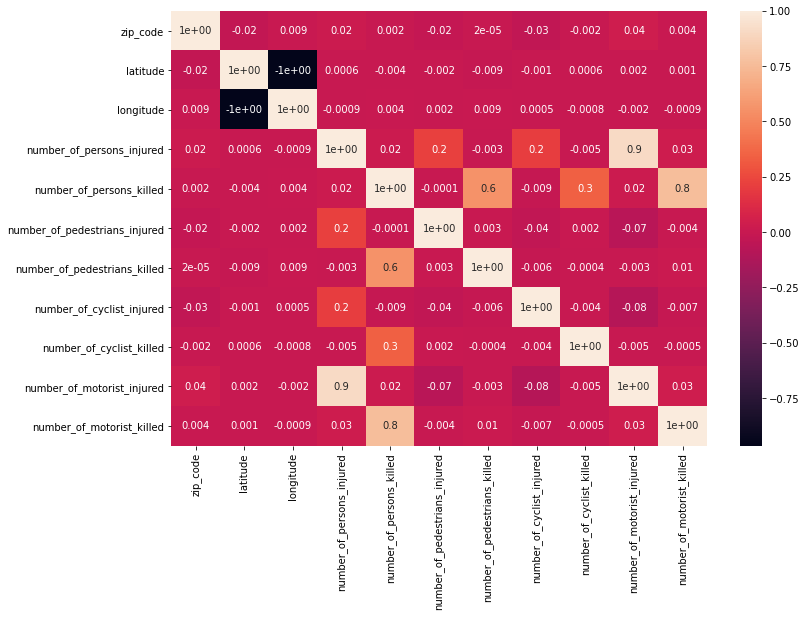

In [25]:
df1 = df.corr()
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df1, annot=True, fmt='.1', ax = ax)
plt.show()

In [26]:
#checking the percentage of missing values for each column
df.isna().sum() / len(df) * 100

crash_date                        0.000
crash_time                        0.000
borough                          35.026
zip_code                         35.034
latitude                          8.035
longitude                         8.035
location                          8.035
on_street_name                   26.009
off_street_name                  52.875
cross_street_name                74.033
number_of_persons_injured         0.000
number_of_persons_killed          0.000
number_of_pedestrians_injured     0.000
number_of_pedestrians_killed      0.000
number_of_cyclist_injured         0.000
number_of_cyclist_killed          0.000
number_of_motorist_injured        0.000
number_of_motorist_killed         0.000
contributing_factor_vehicle_1     0.371
contributing_factor_vehicle_2    19.243
contributing_factor_vehicle_3    91.239
contributing_factor_vehicle_4    97.760
contributing_factor_vehicle_5    99.333
vehicle_type_code1                0.740
vehicle_type_code2               26.589


In [27]:
#null columns before drop
df.isnull().sum()

crash_date                           0
crash_time                           0
borough                          35026
zip_code                         35034
latitude                          8035
longitude                         8035
location                          8035
on_street_name                   26009
off_street_name                  52875
cross_street_name                74033
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      371
contributing_factor_vehicle_2    19243
contributing_factor_vehicle_3    91239
contributing_factor_vehicle_4    97760
contributing_factor_vehicle_5    99333
vehicle_type_code1                 740
vehicle_type_code2               26589
vehicle_type_code_3      

In [28]:
#dropping columns that have more than 75000 null in it
df.drop(df.columns[df.apply(lambda col: col.isnull().sum()) > 75000], axis= 1, inplace= True)

In [29]:
#check columns after drop
df.isnull().sum()

crash_date                           0
crash_time                           0
borough                          35026
zip_code                         35034
latitude                          8035
longitude                         8035
location                          8035
on_street_name                   26009
off_street_name                  52875
cross_street_name                74033
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      371
contributing_factor_vehicle_2    19243
vehicle_type_code1                 740
vehicle_type_code2               26589
dtype: int64

In [30]:
df.dtypes

crash_date                        object
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
location                          object
on_street_name                    object
off_street_name                   object
cross_street_name                 object
number_of_persons_injured          int64
number_of_persons_killed           int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
vehicle_type_code1                object
vehicle_type_code2                object
dtype: object

In [31]:
df.isnull().sum()

crash_date                           0
crash_time                           0
borough                          35026
zip_code                         35034
latitude                          8035
longitude                         8035
location                          8035
on_street_name                   26009
off_street_name                  52875
cross_street_name                74033
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      371
contributing_factor_vehicle_2    19243
vehicle_type_code1                 740
vehicle_type_code2               26589
dtype: int64

In [32]:
#splitting 'crash_date and remove times
df['crash_date'] = df['crash_date'].astype(str)
df['crash_date'] = df['crash_date'].apply(lambda x: str(x)[:10]).astype(object)

df.sample(5)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
collision_id,,,,,,,,,,,,,,,,,,,,,,
4197657,2019-08-31,21:05,QUEENS,11411.0,40.690914,-73.728190,"(40.690914, -73.72819)",234 STREET,LINDEN BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
4315707,2020-05-24,20:00,BROOKLYN,11212.0,40.663690,-73.924805,"(40.66369, -73.924805)",NaN,NaN,1060 RUTLAND ROAD,0,0,0,0,0,0,0,0,Other Vehicular,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
4189208,2019-08-11,13:32,NaN,NaN,40.668648,-73.928350,"(40.668648, -73.92835)",EASTERN PARKWAY,NaN,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Sedan
4332478,2020-07-22,16:30,NaN,NaN,40.747150,-73.985504,"(40.74715, -73.985504)",5 AVENUE,NaN,NaN,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Bike
4202145,2019-09-06,11:53,BRONX,10469.0,40.875990,-73.846890,"(40.87599, -73.84689)",NaN,NaN,3374 CORSA AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,NaN


In [33]:
#adding columns of day, month and year of crash
df['crash_date'] = pd.to_datetime(df.crash_date, format= "%Y-%m-%d")

In [34]:
df['day_crash'] = df['crash_date'].dt.day_name()
df['month_crash'] = df['crash_date'].dt.month
df['year_crash'] = df['crash_date'].dt.year

In [35]:
df.head(5)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,day_crash,month_crash,year_crash
collision_id,,,,,,,,,,,,,,,,,,,,,,,,,
3654181,2017-04-18,23:10,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,NaN,Tuesday,4,2017
3665311,2017-05-06,13:00,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,1,0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,Sedan,NaN,Saturday,5,2017
3658491,2017-04-27,17:15,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,Thursday,4,2017
3666554,2017-05-09,20:10,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Motorcycle,Sedan,Tuesday,5,2017
3653269,2017-04-18,14:00,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Tuesday,4,2017


In [36]:
df2 = df.groupby('year_crash').sum()
df2

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,month_crash
year_crash,,,,,,,,,,,,
2013,11004.0,2.852361e+02,-5.171712e+02,14,0,1,0,0,0,13,0,82
2014,10469.0,4.086976e+01,-7.384488e+01,0,0,0,0,0,0,0,0,10
2015,21463.0,7.743777e+02,-1.404059e+03,14,0,4,0,0,0,10,0,328
2017,40138014.0,2.253716e+05,-4.094601e+05,1497,7,267,0,147,0,1083,7,26035
2018,559875.0,3.339931e+03,-6.190051e+03,30,0,7,0,4,0,19,0,557
2019,310268806.0,1.637589e+06,-2.971936e+06,13630,49,1853,24,1435,8,10341,17,346090
2020,357227170.0,1.871153e+06,-3.395780e+06,22011,137,2607,40,3378,17,16026,80,329197


In [37]:
#replacing 'nan' values on 'borough'

df['borough'].fillna('UNSPECIFIED', inplace= True)

In [38]:
df['zip_code'].isna().sum()


35034

In [39]:
df['zip_code'].unique()

array([10312., 10472., 11420.,    nan, 10456., 11203., 10474., 10301.,
       11223., 11234., 10463., 11419., 10453., 11434., 11207., 10019.,
       10309., 11422., 11233., 11417., 11691., 11358., 10013., 11226.,
       10002., 10038., 10461., 11214., 10033., 11206., 11221., 10467.,
       10011., 10017., 11355., 10027., 11378., 11224., 10305., 10021.,
       10035., 11213., 11208., 10036., 11101., 10009., 11235., 11377.,
       10470., 11219., 10001., 11228., 11215., 11217., 11372., 11379.,
       10460., 11205., 10468., 11416., 10469., 11429., 10007., 11231.,
       11236., 10459., 10462., 10012., 11229., 10031., 11238., 11369.,
       11423., 10026., 10018., 11365., 11370., 11421., 11209., 10465.,
       10025., 10458., 10308., 11375., 10034., 11216., 10455., 11354.,
       11230., 10003., 10471., 11222., 10304., 10457., 11428., 11212.,
       11418., 11210., 10006., 11360., 10022., 10452., 10016., 11201.,
       11432., 10466., 10020., 11232., 11367., 11220., 11218., 11211.,
      

In [40]:
#replace 'nan' values in 'zip code' column by '999'
df['zip_code'].fillna(0, inplace= True)

In [41]:
df['zip_code'].isnull().sum()

0

In [42]:
#fill 'nan' values for 'location' column by '0'
df['location'].fillna(0, inplace= True)


In [43]:
df['location'].isnull().sum()

0

In [44]:
#fill 'nan' values on 'on_street_name' by 'undt' which mean 'undetermied'
df['on_street_name'].fillna('unspecified', inplace= True)
df['on_street_name'].isnull().sum()

0

In [45]:
df['near_street'] = df['cross_street_name'].fillna(df['off_street_name'])
#df['near_street'].fillna('Unspecified', inplace= True)
df['near_street']

collision_id
3654181    243       DARLINGTON AVENUE             
3665311                            BLACKROCK AVENUE
3658491                              FOCH BOULEVARD
3666554                             RICHMOND AVENUE
3653269    1167      BOSTON ROAD                   
                             ...                   
4244961    1314      EAST 29 STREET                
4250093    150-62    76 ROAD                       
4245290                                 KENT AVENUE
4243646    1695      UTICA AVENUE                  
4247517                                    1 AVENUE
Name: near_street, Length: 100000, dtype: object

In [46]:
#dropping non-essential columns and duplicates
df.drop(['longitude', 'latitude', 'off_street_name', 'cross_street_name'], axis= 1, inplace= True)

In [47]:
list1 = ['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured', 'number_of_motorist_killed']
df[list1] = df[list1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head(20)

,crash_date,crash_time,borough,zip_code,location,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,day_crash,month_crash,year_crash,near_street
collision_id,,,,,,,,,,,,,,,,,,,,,,
3654181,2017-04-18,23:10,STATEN ISLAND,10312.0,"(40.536728, -74.193344)",unspecified,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,NaN,Tuesday,4,2017,243 DARLINGTON AVENUE
3665311,2017-05-06,13:00,BRONX,10472.0,"(40.829052, -73.85038)",CASTLE HILL AVENUE,0.066667,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,Failure to Yield Right-of-Way,NaN,Sedan,NaN,Saturday,5,2017,BLACKROCK AVENUE
3658491,2017-04-27,17:15,QUEENS,11420.0,"(40.677303, -73.804565)",135 STREET,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,Thursday,4,2017,FOCH BOULEVARD
3666554,2017-05-09,20:10,UNSPECIFIED,0.0,"(40.624958, -74.145775)",FOREST AVENUE,0.066667,0.0,0.000000,0.0,0.0,0.0,0.066667,0.0,Unspecified,Unspecified,Motorcycle,Sedan,Tuesday,5,2017,RICHMOND AVENUE
3653269,2017-04-18,14:00,BRONX,10456.0,"(40.828846, -73.90312)",unspecified,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Tuesday,4,2017,1167 BOSTON ROAD
3666365,2017-05-08,10:33,UNSPECIFIED,0.0,"(40.556454, -74.20777)",WEST SHORE EXPRESSWAY,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Unsafe Lane Changing,Unspecified,Sedan,Sedan,Monday,5,2017,NaN
3666842,2017-05-10,6:10,UNSPECIFIED,0.0,"(40.740025, -73.97626)",1 AVENUE,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Passing or Lane Usage Improper,Unspecified,Taxi,Box Truck,Wednesday,5,2017,EAST 28 STREET
3657123,2017-04-24,9:30,BROOKLYN,11203.0,"(40.651646, -73.93233)",EAST 48 STREET,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Other Vehicular,Other Vehicular,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Monday,4,2017,CHURCH AVENUE
3651039,2017-04-14,13:00,UNSPECIFIED,0.0,"(40.7518, -73.817314)",ROBINSON STREET,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Friday,4,2017,NaN


In [48]:
df['contributing_factor_vehicle_1'].unique()

array(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Unspecified', 'Unsafe Lane Changing',
       'Passing or Lane Usage Improper', 'Other Vehicular',
       'Passing Too Closely', 'Backing Unsafely',
       'Traffic Control Disregarded', 'Driver Inexperience',
       'Unsafe Speed', 'Following Too Closely', 'Obstruction/Debris',
       'Turning Improperly',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Pavement Slippery', 'Aggressive Driving/Road Rage',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Oversized Vehicle', 'View Obstructed/Limited',
       'Traffic Control Device Improper/Non-Working', 'Fell Asleep',
       'Glare', 'Passenger Distraction', 'Accelerator Defective',
       'Failure to Keep Right', 'Alcohol Involvement',
       'Outside Car Distraction', 'Brakes Defective', nan,
       'Pavement Defective', 'Driverless/Runaway Vehicle',
       'Fatigued/Drowsy', 'Animals Action', 'Tire Failure/Inad

In [49]:
#replacing all 'nan' values by 'undetermined' 
df['contributing_factor_vehicle_1'].fillna('Unspecified', inplace= True)
df['contributing_factor_vehicle_1'].isnull().sum()

0

In [50]:
#replace 'nan' by 'undtermined' for 'contributing_factor_vehicle_2' too
df['contributing_factor_vehicle_2'].fillna('Unspecified', inplace= True)
df['contributing_factor_vehicle_2'].unique() #.isnull().sum()

array(['Unspecified', 'Other Vehicular', 'Failure to Yield Right-of-Way',
       'Backing Unsafely', 'Driver Inattention/Distraction',
       'Turning Improperly', 'Unsafe Lane Changing',
       'Following Too Closely', 'Pavement Slippery',
       'Aggressive Driving/Road Rage',
       'Traffic Control Device Improper/Non-Working',
       'Passing Too Closely', 'Passing or Lane Usage Improper',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Driver Inexperience', 'Unsafe Speed', 'Oversized Vehicle',
       'Passenger Distraction', 'Outside Car Distraction',
       'Traffic Control Disregarded', 'Reaction to Uninvolved Vehicle',
       'Obstruction/Debris', 'Failure to Keep Right', 'Fatigued/Drowsy',
       'Alcohol Involvement', 'View Obstructed/Limited', 'Glare',
       'Lane Marking Improper/Inadequate', 'Illnes',
       'Accelerator Defective', 'Pavement Defective',
       'Tire Failure/Inadequate', 'Brakes Defective',
       'Tow Hitch Defective', 'Driverles

In [51]:
df['vehicle_type_code1'].unique()

array(['Station Wagon/Sport Utility Vehicle', 'Sedan', 'Motorcycle',
       'Taxi', 'Pick-up Truck', 'Ambulance', 'Tractor Truck Diesel',
       'Bus', nan, 'Box Truck', 'Bike', 'deliv', 'Van', 'tower', 'PAS',
       'Tanker', 'Flat Bed', 'Convertible', 'Motorscooter', 'Moped',
       'e-350', 'PASSENGER VEHICLE', 'RV',
       'SPORT UTILITY / STATION WAGON', 'Garbage or Refuse',
       'Chassis Cab', 'self', 'Concrete Mixer', 'Tractor Truck Gasoline',
       '2 dr sedan', 'Tow Truck / Wrecker', 'Beverage Truck', 'Flat Rack',
       'Carry All', 'Motorbike', 'REFG', 'van', '4 dr sedan',
       'Bulk Agriculture', 'PK', 'POSTA', 'TRACT', 'E-Bike', 'DELV',
       'AMB', 'VAN', 'MACK', 'Lift Boom', 'TAXI', '3-Door',
       'SMALL COM VEH(4 TIRES) ', 'winne', 'AMBUL', 'p/sh', 'Dump',
       'Refrigerated Van', 'BOBCA', 'School Bus', 'truck',
       'Armored Truck', 'UNKNO', 'TRUCK', 'WHITE', 'COM', '4D', 'box t',
       'E-Scooter', 'Mack', 'fire', 'UTIL', 'LADDER 34', 'moped', 'DUMP',
   

In [52]:
#consolidating all 'truck' into one
trucks = ['Pick-up Truck', 'Tractor Truck Diesel', 'Box Truck', 'Tractor Truck Gasoline', 'Tow Truck / Wrecker', 'Beverage Truck', 'truck', 'Armored Truck', 'TRUCK', 'Truck', 'Tow Truck', 'FIRE TRUCK', 'PICK-UP TRUCK', 'BOX TRUCK', 'Fire Truck', 'box truck', 'TRUCK FLAT', 'FIRTRUCK', 'TRUCK VAN', 'FIRETRUCK', 'FDNY TRUCK', 'dump truck', 'Fire truck', 'UPS TRUCK', 'fire truck', 'FOOD TRUCK', 'MAIL TRUCK', 'USPS TRUCK', 'tow truck', 'TOW TRUCK', 'Tow truck']
[truck for truck in trucks if 'tow' in truck.lower()]

['Tow Truck / Wrecker', 'Tow Truck', 'tow truck', 'TOW TRUCK', 'Tow truck']

In [53]:
df['vehicle_type_code1'] = df['vehicle_type_code1'].astype(str).str.upper()

In [54]:
df['vehicle_type_code1'].unique()

array(['STATION WAGON/SPORT UTILITY VEHICLE', 'SEDAN', 'MOTORCYCLE',
       'TAXI', 'PICK-UP TRUCK', 'AMBULANCE', 'TRACTOR TRUCK DIESEL',
       'BUS', 'NAN', 'BOX TRUCK', 'BIKE', 'DELIV', 'VAN', 'TOWER', 'PAS',
       'TANKER', 'FLAT BED', 'CONVERTIBLE', 'MOTORSCOOTER', 'MOPED',
       'E-350', 'PASSENGER VEHICLE', 'RV',
       'SPORT UTILITY / STATION WAGON', 'GARBAGE OR REFUSE',
       'CHASSIS CAB', 'SELF', 'CONCRETE MIXER', 'TRACTOR TRUCK GASOLINE',
       '2 DR SEDAN', 'TOW TRUCK / WRECKER', 'BEVERAGE TRUCK', 'FLAT RACK',
       'CARRY ALL', 'MOTORBIKE', 'REFG', '4 DR SEDAN', 'BULK AGRICULTURE',
       'PK', 'POSTA', 'TRACT', 'E-BIKE', 'DELV', 'AMB', 'MACK',
       'LIFT BOOM', '3-DOOR', 'SMALL COM VEH(4 TIRES) ', 'WINNE', 'AMBUL',
       'P/SH', 'DUMP', 'REFRIGERATED VAN', 'BOBCA', 'SCHOOL BUS', 'TRUCK',
       'ARMORED TRUCK', 'UNKNO', 'WHITE', 'COM', '4D', 'BOX T',
       'E-SCOOTER', 'FIRE', 'UTIL', 'LADDER 34', '4DS', 'VAN CAMPER',
       'E-SCO', 'GOLF', 'STAKE OR RACK', 'E

In [55]:
#collecting duplicate values and change them in the column

# AMBULANCE = ['AMBULANCE', 'AMBUL', 'AMB', 'AMBU', 'FDNY AMBUL', 'GEN  AMBUL', 'AMBULACE', 'ALMBULANCE', 'LEASED AMB', 'AMBULENCE', 'ABULANCE', 'WHITE AMBU', 'NYC AMBULA']

# OTHER = ['NAN', 'OTHER', 'UNKNO', 'UNKNOWN', 'UNK', 'OTH', 'UNKN', '0']

# BIKE = ['E BIK', 'E-BIKE', 'BIKE', 'MINIBIKE', 'MOTORBIKE', 'DIRT BIKE', 'E BIKE']

# SKATEBOARD = ['E SKATE BO', 'SKATEBOARD']

# SCOOTER = ['E-SCOOTER', 'E-SCO', 'SCOOT', 'VESPA', 'SCOOTER', 'MOTORSCOOTER', 'MOTORSCOOT', 'CROSS', 'MOTOR SCOO']

# UTILITY = ['STATION WAGON/SPORT UTILITY VEHICLE', 'SPORT UTILITY / STATION WAGON', 'UTILI', 'UTIL', 'UTILITY VE', 'UTILITY.']

# PICK UP = ['PICKU', 'PICK-', 'PU', 'PICK-UP TRUCK', 'PICKUP WITH MOUNTED CAMPER', 'PICK UP TR', 'PICK UP', 'F150XL PIC', 'F-250', 'PICK-UP TR']

# POLICE = ['POLIC', 'POLICE']

# TOW TRUCK = ['TOW TRUCK', 'TOW T', 'TK', 'TOWTR', 'TOW TRUCK / WRECKER', 'TRK', 'TRUCK', 'CEMENT TRU', 'DUMP TRUCK', 'FREIGHT TR'. 'MAIL TRUCK', '18 WHEELER', 'BUCKET TRU', 'FLATBED', 'FLATBED FR', 'FLAT BED', 'FLAT', 'FREIGHT', 'FREIGHT TR', 'TRC', 'FREIG']


# FIRE TRUCK = ['FIRTRUCK', 'FIRE', 'FIRET', 'FDNY LADDE', 'FIRE ENGIN', 'FIRETRUCK'. 'FDNY TRUCK', 'FDNY #226', 'FD LADDER', 'NYC FD']

# TRACTOR = ['TRACTOR TRUCK DIESEL', 'TRACTOR TRUCK GASOLINE', 'TRACT', 'TRACTOR TR', 'TRACTOR', 'JOHN DEERE', 'BACKHOE', 'BOBCAT FOR', 'CAT', 'CAMPER TRA', 'BACK HOE']

# BUS = ['BUS', 'SCHOO', 'SCHOOL BUS', 'MTA BUS', 'POSTAL BUS']

# VAN = ['VAN', 'VAN CAMPER', 'TRUCK VAN', 'WORK VAN', 'FORD VAN', 'USPS VAN']

# DELIVERY = ['DELIVERY', 'DILEVERY T', 'DELIVERY T', 'COURIER', 'UPS TRUCK', 'MESSAGE SI', 'DELIVERY V', 'UPS TRUCK', 'MAIL TRUCK', 'POSTAL TRU', 'FREIG DELV', 'USPS POSTA', 'PAYLO']

# HORSE = ['HRSE', 'HORSE']

# SUBURBAN = ['SUBURBAN', 'SUBN WHI']

In [56]:
#ambulance
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['AMBULANCE', 'AMBUL', 'AMB', 'AMBU', 'FDNY AMBUL', 'GEN  AMBUL', 'AMBULACE', 'ALMBULANCE', 'LEASED AMB', 'AMBULENCE', 'ABULANCE', 'WHITE AMBU', 'NYC AMBULA'], 'AMBULANCE')

#others
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['OTHER', 'OTH', 'CONCRETE MIXER', 'STAKE OR RACK', 'CONT', 'LTR', 'FORKL', 'MOTORIZED HOME', 'CONST', 'TRAIL', 'PARCE', 'HI TA', 'PRKS', 'LUNCH WAGON', 'PEDICAB', 'SWT', 'FRONT-LOAD', 'DRILL RIG', 'MOTOR SKAT', 'TRAILER', 'LAWNMOWER', 'PUMPER', 'CAN', 'GOLF CART', 'PC', 'LIGHT TRAI', 'E REVEL SC', 'GO KART', '1C', 'GATOR', 'SLINGSHOT', 'ROAD SWEEP', 'HRSE', 'HORSE', 'DOT EQUIPM', 'APPOR', 'SPRIN', 'PAS', 'MOTOR', 'HAUL FOR H', 'VEHICLE 2', 'LAWN MOWER', 'SWEEPER', 'NYC ACS VA', 'HOPPER', 'CHURC', 'SKID LOADE', 'ITAS', 'JETSKI', 'DETAC', 'REP', 'SNOW PLOW', 'ART M', 'WORK', 'WAGON', 'ALUMI', 'HAND', 'ACCESS A R', 'TRAIN', 'E SKATE BO', 'SKATEBOARD', 'SKATE', 'E-SKATEBOA', 'E-UNICYCLE', 'ELEC. UNIC'], 'OTHER')

#Unspecified
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['NAN','UNKNO', 'UNKNOWN', 'UNK', 'UNKN', '0', 'UKNOWN', 'UNKNOWN VE', 'UKN'], 'UNSPECIFIED')

#BIKES
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['E BIK', 'E-BIKE', 'BIKE', 'MINIBIKE', 'MOTORBIKE', 'DIRT BIKE', 'E BIKE', 'E-BIK', 'MTA B', 'DIRTBIKE', 'EBIKE', 'MINICYCLE'], 'BIKE')


#SCOOTERS
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['E-SCOOTER', 'E-SCO', 'SCOOT', 'VESPA', 'SCOOTER', 'MOTORSCOOTER', 'MOTORSCOOT', 'CROSS', 'MOTOR SCOO', 'ELECTRIC S', 'E SCO', 'SCOOTER', 'MOPED SCOO', 'MOPED ELEC', 'ELECTRIC M', 'E SCOOTER', 'ESCOOTER', 'PUSH SCOOT','MOPD', 'E-SCOTER', 'GAS SCOOTE'], 'SCOOTER')

#UTILITY 
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['STATION WAGON/SPORT UTILITY VEHICLE', 'SPORT UTILITY / STATION WAGON', 'UTILI', 'UTIL', 'UTILITY VE', 'UTILITY.', 'UTIL WH', 'UTILITY TR', 'CARRY ALL', 'PK', '35 FT', 'UHAUL', 'LIVESTOCK RACK', 'MECHANICAL'], 'UTILITY')

#PICK UP 
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['PICKU', 'PICK-', 'PU', 'PICK-UP TRUCK', 'PICKUP WITH MOUNTED CAMPER', 'PICK UP TR', 'PICK UP', 'F150XL PIC', 'F-250', 'PICK-UP TR', 'PICKUP', 'PICK TRUCK', 'F550'], 'PICK_UP')

#TRUCK
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['TOW TRUCK', 'TOW T', 'TK', 'TOWTR', 'TOW TRUCK / WRECKER', 'TRK', 'TRUCK', 'CEMENT TRU', 'DUMP TRUCK', 'FREIGHT TR', '18 WHEELER', 'BUCKET TRU', 'FLATBED', 'FLATBED FR', 'FLAT BED', 'FLAT', 'FREIGHT', 'FREIGHT TR', 'TRC', 'FREIG', 'BOXTR', 'BEVERAGE TRUCK', 'DUMP', 'TUCK', 'CEMEN', 'MTA TRUCK', 'UHAUL TRUC', 'TRUCK TRAI', 'GARBAGE OR REFUSE', 'CHASSIS CAB', 'ARMORED TRUCK', 'FLAT RACK', 'MACK', 'GARBAGE TR', 'TRUCK FLAT', 'BOX', 'FOOD TRUCK', 'BS'], 'TRUCK')

#FIRE TRUCK 
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['FIRTRUCK', 'FIRE', 'FIRET', 'FDNY LADDE', 'FIRE ENGIN', 'FIRETRUCK', 'FDNY TRUCK', 'FDNY #226', 'FD LADDER', 'NYC FD', 'FDNY FIRE', 'FDNY', 'FDNY ENGIN', 'FDNY FIRET', 'FIRE TRUCK', 'NYC FIRETR', 'LADDER TRU', 'LADDER 34', 'FDNY EMS'], 'FIRE_TRUCK')

#TRACTOR
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['TRACTOR TRUCK DIESEL', 'TRACTOR TRUCK GASOLINE', 'TRACT', 'TRACTOR TR', 'TRACTOR', 'JOHN DEERE', 'BACKHOE', 'BOBCAT FOR', 'CAT', 'CAMPER TRA', 'BACK HOE', 'TRAC', 'JOHN', 'BULK AGRICULTURE', 'CAT.', 'EXCAV'], 'TRACTOR')

#BUS
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['BUS', 'SCHOO', 'SCHOOL BUS', 'MTA BUS', 'POSTAL BUS', 'SCHOOLBUS', 'NYC BUS'], 'BUS')

#VAN 
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['VAN', 'VAN CAMPER', 'TRUCK VAN', 'WORK VAN', 'FORD VAN', 'USPS VAN', 'REFRIGERATED VAN', 'CARGO VAN', 'VAN T', 'VAN (', 'ENCLOSED BODY - NONREMOVABLE ENCLOSURE', 'COMMERCIAL', 'CHEVY EXPR', 'MOVING VAN', 'ENCLOSED BODY - REMOVABLE ENCLOSURE', 'MOBIL'], 'VAN')

#DELIVERY
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['DELIVERY', 'DILEVERY T', 'DELIVERY T', 'COURIER', 'UPS TRUCK', 'MESSAGE SI', 'DELIVERY V', 'UPS TRUCK', 'MAIL TRUCK', 'POSTAL TRU', 'FREIG DELV', 'USPS POSTA', 'PAYLO', 'POSTA', 'FREIGHT FL', 'USPS', 'DELV', 'DELIV', 'MAIL', 'DIRTB', 'MOVIN', 'POST', 'USPOS', 'MAILTRUCK', 'AMAZON SPR', 'FREIGHTLIN', 'USPS TRUCK', 'FREIGHTLIN', 'FRIEGHTLIN', 'USPS/GOVT'], 'DELIVERY')

#POLICE
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['POLIC', 'POLICE', 'MULTI-WHEELED VEHICLE', 'EMS', 'NYS A', 'GOVERNMENT', 'TANKER'], 'POLICE')

#LIFT 
df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['BOOM LIFT', 'FOLK LIFT', 'FORKLIFT', 'LIFT BOOM', 'LIFT', 'FORK LIFT', 'LIFT', 'FORLIFT', 'WELL DRILLER', 'FORK'], 'LIFT')

df['vehicle_type_code1'] = df['vehicle_type_code1'].replace(['PASSENGER VEHICLE', 'MOPED', 'E-350', 'RV', 'SMALL COM VEH(4 TIRES) ', 'SEDAN', 'SELF', '2 DR SEDAN', 'REFG', '4 DR SEDAN', 'WINNE', 'P/SH', 'BOBCA', 'WHITE', 'COM', '4D', 'BOX T', '4DS', 'GOLF', 'LIMO', 'PARCE', 'OPEN BODY', 'UT', 'CITY', 'COMME', 'BACKH', 'WINEB', 'MINI', 'G SPC', 'TRLR', 'BACK', 'DIRT', 'TRL', 'RMP V', 'ELECT', 'LIMOU', 'MTA', 'US PO', 'BTM', 'COMM.', 'RANGE', 'BULLD', 'SMART CAR', 'PSD', 'SUV', 'POWER SHOV', '3-DOOR', 'DARK COLOR', 'J1', 'SUBURBAN', 'SUBN WHI','SUBN', 'WH FORD CO', 'CHEVROLET', 'LCOMM', 'FUSION', 'FORD SPRIN', 'E450', 'STREE', 'POWER', 'SUBURBANE', 'TOWER'], 'PRIVATE')

df['vehicle_type_code1'] = df['vehicle_type_code1'].astype(str).str.lower()

df['vehicle_type_code1'].unique()

array(['utility', 'private', 'motorcycle', 'taxi', 'pick_up', 'ambulance',
       'tractor', 'bus', 'unspecified', 'box truck', 'bike', 'delivery',
       'van', 'other', 'police', 'truck', 'convertible', 'scooter',
       'lift', 'fire_truck'], dtype=object)

In [57]:
#checking for last 'nan' values
df['vehicle_type_code1'].isnull().sum()

0

In [58]:
#lowercase all columns tfor a first duplicates clean 
df['vehicle_type_code2'] = df['vehicle_type_code2'].astype(str).str.upper()
df['vehicle_type_code2'].unique()

array(['NAN', 'SEDAN', 'STATION WAGON/SPORT UTILITY VEHICLE', 'BOX TRUCK',
       'PAS', 'MOTORCYCLE', 'BIKE', 'TRACTOR TRUCK DIESEL',
       'PICK-UP TRUCK', 'TAXI', 'GARBAGE OR REFUSE', 'UNKNO', '3-DOOR',
       'DUMP', 'VAN', 'CONVERTIBLE', 'BUS', 'CARRY ALL', '4 DR SEDAN',
       'PK', 'SCHOOL BUS', 'FOOD', 'MOPED', 'UHAUL', 'TRAIL',
       'ARMORED TRUCK', 'SMALL COM VEH(4 TIRES) ',
       'SPORT UTILITY / STATION WAGON', 'FDNY', 'USPS', 'CEMEN',
       'WELL DRILLER', 'VAN CAMPER', 'FLAT BED', 'CHASSIS CAB',
       'TOW TRUCK / WRECKER', 'TRUCK', 'TUCK', 'DELV',
       'TRACTOR TRUCK GASOLINE', 'TANKER', 'CONCRETE MIXER',
       'REFRIGERATED VAN', 'PSD', 'RV', 'BOX T', 'UNKNOWN', 'FIRET',
       'COM', 'FDNY FIRET', 'AMBUL', 'FIRE', 'AMBULANCE', 'LIFT BOOM',
       'UNK', 'INTL', 'SCHOO', 'TOW T', 'MOTOR', 'POLIC', 'P/SH', 'DELIV',
       'BEVERAGE TRUCK', 'PASSENGER VEHICLE', 'E-BIK', 'MTA B', 'E-SCO',
       'CRANE', 'MOTORBIKE', 'STAKE OR RACK', 'FORKL', 'MAIL', 'DIRTB',
    

In [59]:
#applying same filter to code 2

#ambulance
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['AMBULANCE', 'AMBUL', 'AMB', 'AMBU', 'FDNY AMBUL', 'GEN  AMBUL', 'AMBULACE', 'ALMBULANCE', 'LEASED AMB', 'AMBULENCE', 'ABULANCE', 'WHITE AMBU', 'NYC AMBULA'], 'AMBULANCE')

#others
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['OTHER', 'OTH', 'CONCRETE MIXER', 'STAKE OR RACK', 'CONT', 'LTR', 'FORKL', 'MOTORIZED HOME', 'CONST', 'TRAIL', 'PARCE', 'HI TA', 'PRKS', 'LUNCH WAGON', 'PEDICAB', 'SWT', 'FRONT-LOAD', 'DRILL RIG', 'MOTOR SKAT', 'TRAILER', 'LAWNMOWER', 'PUMPER', 'CAN', 'GOLF CART', 'PC', 'LIGHT TRAI', 'E REVEL SC', 'GO KART', '1C', 'GATOR', 'SLINGSHOT', 'ROAD SWEEP', 'HRSE', 'HORSE', 'DOT EQUIPM', 'APPOR', 'SPRIN', 'PAS', 'MOTOR', 'HAUL FOR H', 'VEHICLE 2', 'LAWN MOWER', 'SWEEPER', 'NYC ACS VA', 'HOPPER', 'CHURC', 'SKID LOADE', 'ITAS', 'JETSKI', 'DETAC', 'REP', 'SNOW PLOW', 'ART M', 'WORK', 'WAGON', 'ALUMI', 'HAND', 'ACCESS A R', 'TRAIN', 'E SKATE BO', 'SKATEBOARD', 'SKATE', 'E-SKATEBOA', 'E-UNICYCLE', 'ELEC. UNIC', 'E-SKA'], 'OTHER')

#Unspecified
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['NAN','UNKNO', 'UNKNOWN', 'UNK', 'UNKN', '0', 'UKNOWN', 'UNKNOWN VE', 'UKN'], 'UNSPECIFIED')

#BIKES
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['E BIK', 'E-BIKE', 'BIKE', 'MINIBIKE', 'MOTORBIKE', 'DIRT BIKE', 'E BIKE', 'E-BIK', 'MTA B', 'DIRTBIKE', 'EBIKE', 'MINICYCLE', 'T630 FORKL'], 'BIKE')


#SCOOTERS
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['E-SCOOTER', 'E-SCO', 'SCOOT', 'VESPA', 'SCOOTER', 'MOTORSCOOTER', 'MOTORSCOOT', 'CROSS', 'MOTOR SCOO', 'ELECTRIC S', 'E SCO', 'SCOOTER', 'MOPED SCOO', 'MOPED ELEC', 'ELECTRIC M', 'E SCOOTER', 'ESCOOTER', 'PUSH SCOOT','MOPD', 'E-SCOTER', 'GAS SCOOTE', 'RAZOR SCOO'], 'SCOOTER')

#UTILITY 
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['STATION WAGON/SPORT UTILITY VEHICLE', 'SPORT UTILITY / STATION WAGON', 'UTILI', 'UTIL', 'UTILITY VE', 'UTILITY.', 'UTIL WH', 'UTILITY TR', 'CARRY ALL', 'PK', '35 FT', 'UHAUL', 'LIVESTOCK RACK', 'MECHANICAL', 'FOOD', 'PASS', 'CONSTRUCTI', 'SANITATION'], 'UTILITY')

#PICK UP 
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['PICKU', 'PICK-', 'PU', 'PICK-UP TRUCK', 'PICKUP WITH MOUNTED CAMPER', 'PICK UP TR', 'PICK UP', 'F150XL PIC', 'F-250', 'PICK-UP TR', 'PICKUP', 'PICK TRUCK', 'F550', 'IP', 'PICK', 'RAM'], 'PICK_UP')

#TRUCK
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['TOW TRUCK', 'TOW T', 'TK', 'TOWTR', 'TOW TRUCK / WRECKER', 'TRK', 'TRUCK', 'CEMENT TRU', 'DUMP TRUCK', 'FREIGHT TR', '18 WHEELER', 'BUCKET TRU', 'FLATBED', 'FLATBED FR', 'FLAT BED', 'FLAT', 'FREIGHT', 'FREIGHT TR', 'TRC', 'FREIG', 'BOXTR', 'BEVERAGE TRUCK', 'DUMP', 'TUCK', 'CEMEN', 'MTA TRUCK', 'UHAUL TRUC', 'TRUCK TRAI', 'GARBAGE OR REFUSE', 'CHASSIS CAB', 'ARMORED TRUCK', 'FLAT RACK', 'MACK', 'GARBAGE TR', 'TRUCK FLAT', 'BOX', 'FOOD TRUCK', 'BS', 'BOX TRUCK', 'GARBA', 'FD TRUCK', '18 WEELER', 'CARGO TRUC', 'U-HAUL', 'TILT TANDE', 'EMS TRUCK'], 'TRUCK')

#FIRE TRUCK 
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['FIRTRUCK', 'FIRE', 'FIRET', 'FDNY LADDE', 'FIRE ENGIN', 'FIRETRUCK', 'FDNY TRUCK', 'FDNY #226', 'FD LADDER', 'NYC FD', 'FDNY FIRE', 'FDNY', 'FDNY ENGIN', 'FDNY FIRET', 'FIRE TRUCK', 'NYC FIRETR', 'LADDER TRU', 'LADDER 34', 'FDNY EMS'], 'FIRE_TRUCK')

#TRACTOR
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['TRACTOR TRUCK DIESEL', 'TRACTOR TRUCK GASOLINE', 'TRACT', 'TRACTOR TR', 'TRACTOR', 'JOHN DEERE', 'BACKHOE', 'BOBCAT FOR', 'CAT', 'CAMPER TRA', 'BACK HOE', 'TRAC', 'JOHN', 'BULK AGRICULTURE', 'CAT.', 'EXCAV', 'BACKHOE LO', 'TRA/R', 'CAT32', '18 WEELER', 'ESCOVATOR', 'ENGIN'], 'TRACTOR')

#BUS
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['BUS', 'SCHOO', 'SCHOOL BUS', 'MTA BUS', 'POSTAL BUS', 'SCHOOLBUS', 'NYC BUS', 'TRANSPORT', 'TRANS', 'DEPAR', 'INTERNATIO'], 'BUS')

#VAN 
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['VAN', 'VAN CAMPER', 'TRUCK VAN', 'WORK VAN', 'FORD VAN', 'USPS VAN', 'REFRIGERATED VAN', 'CARGO VAN', 'VAN T', 'VAN (', 'ENCLOSED BODY - NONREMOVABLE ENCLOSURE', 'COMMERCIAL', 'CHEVY EXPR', 'MOVING VAN', 'ENCLOSED BODY - REMOVABLE ENCLOSURE', 'MOBIL', 'GLASS RACK', 'MINI VAN', 'VANETTE', 'LCOM', 'COMMERICAL', 'ICE CREAM', 'CAMPE', 'VAN/TRANSI', 'REVEL', 'ENCLO', 'MOBILE', 'TL', 'HEARSE'], 'VAN')

#DELIVERY
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['DELIVERY', 'DILEVERY T', 'DELIVERY T', 'COURIER', 'UPS TRUCK', 'MESSAGE SI', 'DELIVERY V', 'UPS TRUCK', 'MAIL TRUCK', 'POSTAL TRU', 'FREIG DELV', 'USPS POSTA', 'PAYLO', 'POSTA', 'FREIGHT FL', 'USPS', 'DELV', 'DELIV', 'MAIL', 'DIRTB', 'MOVIN', 'POST', 'USPOS', 'MAILTRUCK', 'AMAZON SPR', 'FREIGHTLIN', 'USPS TRUCK', 'FREIGHTLIN', 'FRIEGHTLIN', 'USPS/GOVT', 'LIVERY VEHICLE', 'DP'], 'DELIVERY')

#POLICE
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['POLIC', 'POLICE', 'MULTI-WHEELED VEHICLE', 'EMS', 'NYS A', 'GOVERNMENT', 'TANKER', 'US GOVT VE'], 'POLICE')

#LIFT 
df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['BOOM LIFT', 'FOLK LIFT', 'FORKLIFT', 'LIFT BOOM', 'LIFT', 'FORK LIFT', 'LIFT', 'FORLIFT', 'WELL DRILLER', 'FORK', 'CRANE', 'GLP050VXEV', 'PALLET', 'JLG L', 'TREE CUTTE'], 'LIFT')

df['vehicle_type_code2'] = df['vehicle_type_code2'].replace(['PASSENGER VEHICLE', 'MOPED', 'E-350', 'RV', 'SMALL COM VEH(4 TIRES) ', 'SEDAN', 'SELF', '2 DR SEDAN', 'REFG', '4 DR SEDAN', 'WINNE', 'P/SH', 'BOBCA', 'WHITE', 'COM', '4D', 'BOX T', '4DS', 'GOLF', 'LIMO', 'PARCE', 'OPEN BODY', 'UT', 'CITY', 'COMME', 'BACKH', 'WINEB', 'MINI', 'G SPC', 'TRLR', 'BACK', 'DIRT', 'TRL', 'RMP V', 'ELECT', 'LIMOU', 'MTA', 'US PO', 'BTM', 'COMM.', 'RANGE', 'BULLD', 'SMART CAR', 'PSD', 'SUV', 'POWER SHOV', '3-DOOR', 'DARK COLOR', 'J1', 'SUBURBAN', 'SUBN WHI','SUBN', 'WH FORD CO', 'CHEVROLET', 'LCOMM', 'FUSION', 'FORD SPRIN', 'E450', 'STREE', 'POWER', 'SUBURBANE', 'CONVERTIBLE', 'INTL', 'E350', 'BOOM', 'FORD', 'YELLO', 'PALFINGER', 'STREET SWE', 'TOYOTA', 'STREET CLE', 'FLEET', 'LEFT THE S', '4DSD', 'E250', 'ASPHA', 'BLACK', 'TOWER', 'BOB CAT', 'SPECIAL PU', 'LMA', 'SPEC-', 'GLNEN', 'I1', 'C1', 'FED E', 'SELF-', 'RDS', 'FRT'], 'PRIVATE')

df['vehicle_type_code2'] = df['vehicle_type_code2'].astype(str).str.lower()

df['vehicle_type_code2'].unique()

array(['unspecified', 'private', 'utility', 'truck', 'other',
       'motorcycle', 'bike', 'tractor', 'pick_up', 'taxi', 'van', 'bus',
       'fire_truck', 'delivery', 'lift', 'police', 'ambulance', 'scooter'],
      dtype=object)

In [60]:
df.shape

(100000, 22)

In [61]:
dummies = pd.get_dummies(df, columns=['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'vehicle_type_code1', 'vehicle_type_code2'])
dummies

,crash_date,crash_time,borough,zip_code,location,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,day_crash,...,vehicle_type_code2_delivery,vehicle_type_code2_fire_truck,vehicle_type_code2_lift,vehicle_type_code2_motorcycle,vehicle_type_code2_other,vehicle_type_code2_pick_up,vehicle_type_code2_police,vehicle_type_code2_private,vehicle_type_code2_scooter,vehicle_type_code2_taxi,vehicle_type_code2_tractor,vehicle_type_code2_truck,vehicle_type_code2_unspecified,vehicle_type_code2_utility,vehicle_type_code2_van
collision_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3654181,2017-04-18,23:10,STATEN ISLAND,10312.0,"(40.536728, -74.193344)",unspecified,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Tuesday,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3665311,2017-05-06,13:00,BRONX,10472.0,"(40.829052, -73.85038)",CASTLE HILL AVENUE,0.066667,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,Saturday,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3658491,2017-04-27,17:15,QUEENS,11420.0,"(40.677303, -73.804565)",135 STREET,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Thursday,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3666554,2017-05-09,20:10,UNSPECIFIED,0.0,"(40.624958, -74.145775)",FOREST AVENUE,0.066667,0.0,0.000000,0.0,0.0,0.0,0.066667,0.0,Tuesday,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3653269,2017-04-18,14:00,BRONX,10456.0,"(40.828846, -73.90312)",unspecified,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Tuesday,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244961,2019-11-20,15:00,BROOKLYN,11210.0,"(40.618893, -73.94642)",unspecified,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Wednesday,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4250093,2019-12-01,11:22,QUEENS,11367.0,"(40.72338, -73.81475)",unspecified,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Sunday,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4245290,2019-11-21,21:30,BROOKLYN,11249.0,"(40.71082, -73.96853)",BROADWAY,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Thursday,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
df.reset_index(drop= True, inplace= True)

# Splitting data

In [63]:
#import sklearn for the train-test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
import csv

#dividing datas into train and test 
train, test = train_test_split(df, test_size=0.2)

In [64]:
print('test data = ', len(test))

test data =  20000


In [65]:
print('train data = ', len(train))

train data =  80000


In [66]:
print(train)

      crash_date crash_time      borough  zip_code                location  \
29855 2019-08-04      15:50    MANHATTAN   10017.0   (40.75182, -73.97904)   
12755 2019-08-13       9:30  UNSPECIFIED       0.0   (40.84432, -73.89988)   
11162 2019-08-11      23:24  UNSPECIFIED       0.0    (40.815437, -73.924)   
12308 2019-09-03      16:52  UNSPECIFIED       0.0                       0   
97179 2019-11-27      20:20       QUEENS   11694.0   (40.580383, -73.8281)   
...          ...        ...          ...       ...                     ...   
50350 2020-08-19       0:00  UNSPECIFIED       0.0  (40.713078, -73.98507)   
64111 2020-07-15      20:45       QUEENS   11434.0  (40.674744, -73.76368)   
72184 2020-07-20      14:00     BROOKLYN   11206.0  (40.70196, -73.944016)   
49317 2020-08-09       0:43  UNSPECIFIED       0.0  (40.666306, -73.79171)   
66898 2020-06-30      16:39  UNSPECIFIED       0.0   (40.640385, -74.1722)   

                         on_street_name  number_of_persons_inju

In [67]:
print(train.shape)
print(test.shape)

(80000, 22)
(20000, 22)


In [68]:
#saving files to csv files
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)
df.to_csv('without_dummies.csv', index=False)
dummies.to_csv('with_dummies.csv', index=False)